# Single-variate Linear Regression


$$\hat{y} = \theta_{1}x + \theta_{0}$$


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


import os
import sys
utils_path = os.path.dirname(os.path.abspath(__name__)) + '/utils/'
if utils_path not in sys.path:    
    sys.path.append(utils_path)

from LR_dataset_generator import LR_dataset_generator

plt.style.use('seaborn')
np.random.seed(0)

***
## Dataset Preparation

$$y = 2x + 1$$

In [10]:
n_sample = 200
coefficient_list = [1, 2]

data_gen = LR_dataset_generator(feature_dim = 1)
data_gen.set_n_sample(n_sample)
data_gen.set_coefficient(coefficient_list)
dataset = data_gen.make_dataset()

print(dataset.shape)

(200, 3)


***
## One Iteration of GDM


$$
\hat{y} = \theta_{1}x + \theta_{0}
$$


$$ \mathcal{L}^{(i)} = (y^{(i)} - \hat{y}^{(i)})^{2} = (y^{(i)} - (\theta_{1}x^{(i)} + \theta_{0}))^{2}$$

$$
\frac {\partial \mathcal{L}^{(i)}} {\partial \theta_{1}}
= -2x^{(i)}(y^{(i)} - \hat{y}^{(i)})
$$

$$
\frac {\partial \mathcal{L}^{(i)}} {\partial \theta_{0}}
= -2(y^{(i)} - \hat{y}^{(i)})
$$


$$ \theta_{1} := \theta_{1} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial \theta} 
= \theta_{1} + 2\alpha x^{(i)}(y^{(i)} - \hat{y}^{(i)})$$

$$ \theta_{0} := \theta_{0} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial \theta} 
= \theta_{0} + 2\alpha(y^{(i)} - \hat{y}^{(i)})$$

***
## Gradient Descent Method

$\theta_{1}, \theta_{0}$를 학습

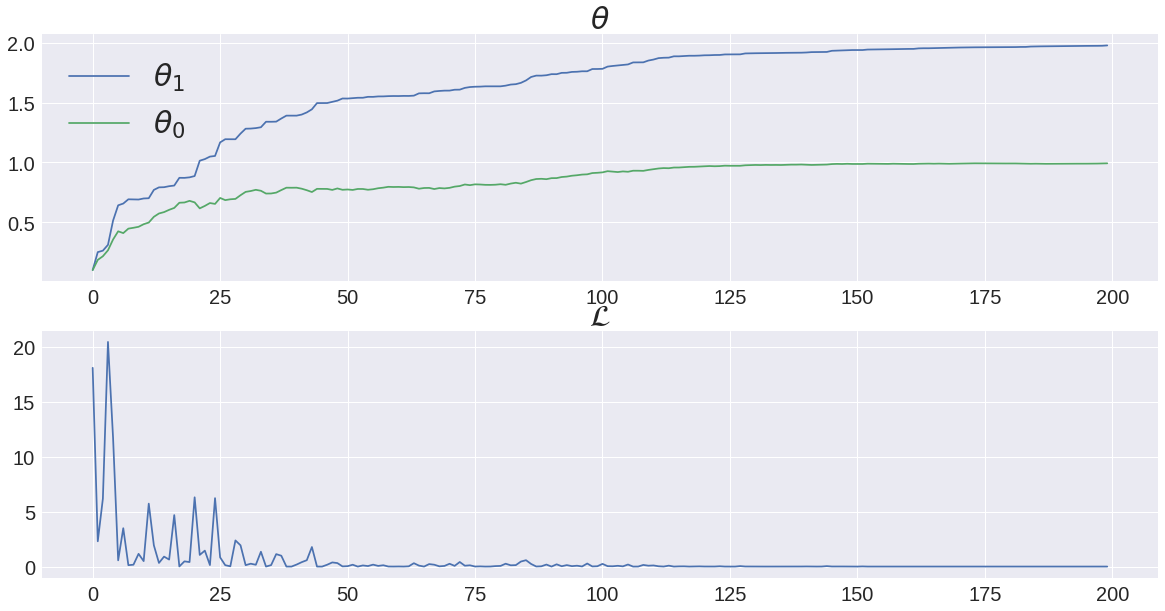

In [11]:
th1, th0 = 0.1, 0.1
lr = 0.01
epochs = 1

th1_list, th0_list = [], []
loss_list = []

for epoch in range(epochs):
    for data_sample in dataset:
        x, y = data_sample[1], data_sample[-1]
        
        pred = th1*x + th0
        loss = np.power(y - pred, 2)
        
        th1_list.append(th1)
        th0_list.append(th0)
        loss_list.append(loss)
    
        th1 = th1 + 2*x*lr*(y - pred)
        th0 = th0 + 2*lr*(y - pred)
        
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(th1_list, label = r'$\theta_{1}$')
ax[0].plot(th0_list, label = r'$\theta_{0}$')
ax[0].legend(loc = 'upper left', fontsize = 30)
ax[1].plot(loss_list)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

***
## Predictor Visualization

Text(0, 0.5, 'y data')

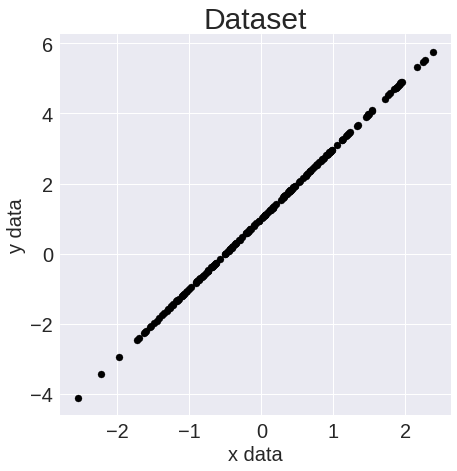

In [12]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(dataset[:,1], dataset[:,-1], color = 'black')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_title("Dataset", fontsize = 30)
ax.set_xlabel("x data", fontsize = 20)
ax.set_ylabel("y data", fontsize = 20)

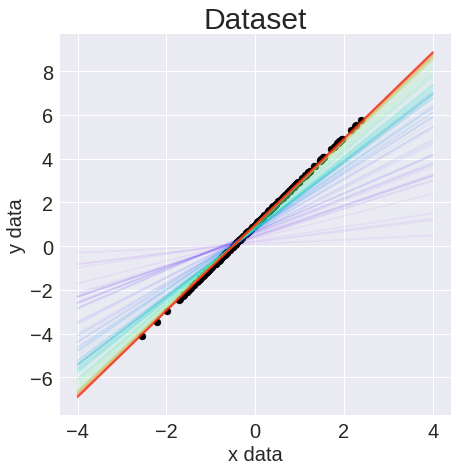

In [13]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(dataset[:,1], dataset[:,-1], color = 'black')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_title("Dataset", fontsize = 30)
ax.set_xlabel("x data", fontsize = 20)
ax.set_ylabel("y data", fontsize = 20)

x_range = np.linspace(-4, 4, 2)
cmap = cm.get_cmap('rainbow', lut = len(th1_list))
for th_idx, (th1,th0) in enumerate(zip(th1_list, th0_list)):
    predictor = th1*x_range + th0
    ax.plot(x_range, predictor,
            color = cmap(th_idx),
            alpha = 0.05)